In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from scipy.fft import fft
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns

In [2]:
raw_train_data = pd.read_csv('train.csv')
raw_test_data = pd.read_csv('test.csv')
data_label = pd.read_csv('train_labels.csv')

In [3]:
def create_windows(data, window_size):
    num_rows = len(data)
    num_windows = int(num_rows / window_size)
    windows = [data.iloc[i * window_size:(i + 1) * window_size] for i in range(num_windows)]
    return windows

In [4]:
window_size = 60
train_windows = create_windows(raw_train_data, window_size)

In [5]:
window_size = 60
test_windows = create_windows(raw_test_data, window_size)

In [39]:
def calculate_features_1(window):
    window = window.drop(['subject', 'step', 'sequence'], axis=1)
    features = {}
    for col in window.columns:
        features[f'{col}_mean'] = window[col].mean()
        features[f'{col}_median'] = window[col].median()
        features[f'{col}_mode'] = window[col].mode()[0]
        features[f'{col}_min'] = window[col].min()
        features[f'{col}_max'] = window[col].max()
    return features

def save_features_1(raw_data, window_size, output_filename):
    num_rows = len(raw_data)
    num_windows = num_rows // window_size
    windows = [raw_data.iloc[i*window_size:(i+1)*window_size] for i in range(num_windows)]

    feature_vectors = [calculate_features_1(window) for window in windows]

    features_df = pd.DataFrame(feature_vectors)
    features_df.to_csv(output_filename, index=False)


In [26]:
save_features_1(raw_train_data, 60, 'feature_1_train.csv')
save_features_1(raw_test_data, 60,  'feature_1_test.csv')

Features saved to 'feature_1_train.csv'
Features saved to 'feature_1_test.csv'


In [27]:
def perform_LGR1(X, y, n_folds=5, max_iter=10000, image_filename='feature_1_Logistics_Regression.png'):
    fold_size = len(X) // n_folds
    auc_scores = []

    plt.figure(figsize=(10, 6))

    for i in range(n_folds):
        start, end = i * fold_size, (i + 1) * fold_size
        X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
        y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
        X_val = X.iloc[start:end]
        y_val = y.iloc[start:end]

        model = LogisticRegression(max_iter=max_iter)
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        auc_score = roc_auc_score(y_val, y_pred_proba)
        auc_scores.append(auc_score)

        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        plt.plot(fpr, tpr, label=f'Fold {i+1} AUC = {auc_score:.3f}')

    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Cross-Validation ROC Curves')
    plt.legend(loc='lower right')
    plt.savefig(image_filename)
    plt.show()

    return auc_scores


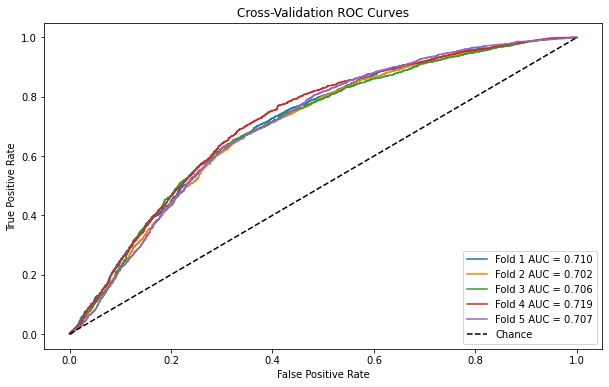

In [38]:
feature_1 = pd.read_csv('feature_1_train.csv')
auc_scores_LGR1 = perform_LGR1(feature_1,data_label['state'])

feature 2

In [4]:
def calculate_features_2(window):
    window = window.drop(['subject', 'step', 'sequence'], axis=1)
    features = {}
    window['sensor_sum1'] = window[['sensor_00', 'sensor_09', 'sensor_06']].sum(axis=1)
    window['sensor_sum2'] = window[['sensor_03', 'sensor_11', 'sensor_07']].sum(axis=1)

    for sum_feature in ['sensor_sum1', 'sensor_sum2']:
        features[f'{sum_feature}_mean'] = window[sum_feature].mean()
        features[f'{sum_feature}_median'] = window[sum_feature].median()
        features[f'{sum_feature}_mode'] = window[sum_feature].mode()
        features[f'{sum_feature}_min'] = window[sum_feature].min()
        features[f'{sum_feature}_max'] = window[sum_feature].max()
    
    for col in window.columns:
        features[f'{col}_mean'] = window[col].mean()
        features[f'{col}_median'] = window[col].median()
        features[f'{col}_mode'] = window[col].mode()[0]  
        features[f'{col}_min'] = window[col].min()
        features[f'{col}_max'] = window[col].max()

    return features


def save_features_2(raw_data, window_size, output_filename):
    num_rows = len(raw_data)
    num_windows = num_rows // window_size
    windows = [raw_data.iloc[i*window_size:(i+1)*window_size] for i in range(num_windows)]

    feature_vectors = [calculate_features_2(window) for window in windows]

    features_df = pd.DataFrame(feature_vectors)
    features_df.to_csv(output_filename, index=False)



In [30]:
save_features_2(raw_train_data, 60, 'feature_2_train.csv')
save_features_2(raw_test_data, 60,  'feature_2_test.csv')

Features saved to 'feature_2_train.csv'
Features saved to 'feature_2_test.csv'


In [40]:
def perform_LGR2(X, y, n_folds=5, max_iter=10000, image_filename='feature_2_Logistics_Regression.png'):
    fold_size = len(X) // n_folds
    auc_scores = []

    plt.figure(figsize=(10, 6))

    for i in range(n_folds):
        start, end = i * fold_size, (i + 1) * fold_size
        X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
        y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
        X_val = X.iloc[start:end]
        y_val = y.iloc[start:end]

        model = LogisticRegression(max_iter=max_iter)
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        auc_score = roc_auc_score(y_val, y_pred_proba)
        auc_scores.append(auc_score)

        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        plt.plot(fpr, tpr, label=f'Fold {i+1} AUC = {auc_score:.3f}')

    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Cross-Validation ROC Curves')
    plt.legend(loc='lower right')
    plt.savefig(image_filename)
    plt.show()

    return auc_scores

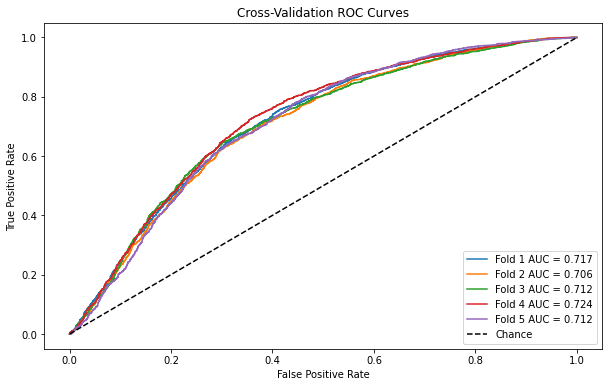

In [41]:
feature_2 = pd.read_csv('feature_2_train.csv')
auc_scores_LGR2 = perform_LGR2(feature_2,data_label['state'])

feature 3

In [33]:
def calculate_features_3(window):
    window = window.drop(['subject', 'step', 'sequence'], axis=1)
    features = {}
    for col in window.columns:
        features[f'{col}_mean'] = window[col].mean()
        features[f'{col}_std'] = window[col].std()
        features[f'{col}_skew'] = window[col].skew()
        features[f'{col}_kurtosis'] = window[col].kurtosis()

    return features


def save_features_3(raw_data, window_size, output_filename):
    num_rows = len(raw_data)
    num_windows = num_rows // window_size
    windows = [raw_data.iloc[i*window_size:(i+1)*window_size] for i in range(num_windows)]

    feature_vectors = [calculate_features_3(window) for window in windows]

    features_df = pd.DataFrame(feature_vectors)
    features_df.to_csv(output_filename, index=False)



In [34]:
save_features_3(raw_train_data, 60, 'feature_3_train.csv')
save_features_3(raw_test_data, 60,  'feature_3_test.csv')

Features saved to 'feature_3_train.csv'
Features saved to 'feature_3_test.csv'


In [42]:
def perform_LGR3(X, y, n_folds=5, max_iter=10000, image_filename='feature_3_Logistics_Regression.png'):
    fold_size = len(X) // n_folds
    auc_scores = []

    plt.figure(figsize=(10, 6))

    for i in range(n_folds):
        start, end = i * fold_size, (i + 1) * fold_size
        X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
        y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
        X_val = X.iloc[start:end]
        y_val = y.iloc[start:end]

        model = LogisticRegression(max_iter=max_iter)
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        auc_score = roc_auc_score(y_val, y_pred_proba)
        auc_scores.append(auc_score)

        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        plt.plot(fpr, tpr, label=f'Fold {i+1} AUC = {auc_score:.3f}')

    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Cross-Validation ROC Curves')
    plt.legend(loc='lower right')
    plt.savefig(image_filename)
    plt.show()

    return auc_scores

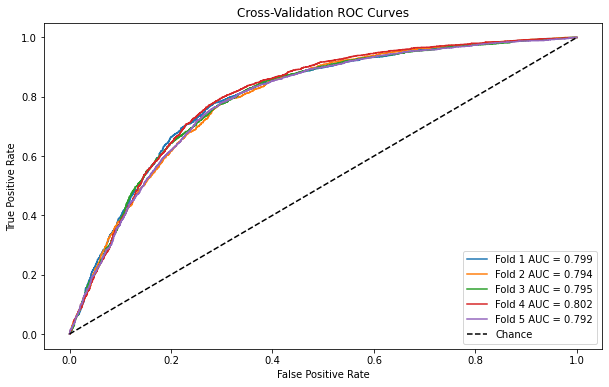

In [43]:
feature_3 = pd.read_csv('feature_3_train.csv')
auc_scores_LGR3 = perform_LGR3(feature_3,data_label['state'])

feature 4

In [47]:
def calculate_sma(value_list):
    absolute_value = np.abs(value_list)
    sma = np.sum(absolute_value)
    return sma

def calculate_fft_features(sensor_data):
    sensor_array = np.array(sensor_data)
    fft_values = np.abs(fft(sensor_array))
    top_n = 10
    return np.mean(fft_values[:top_n])

def calculate_features_4(window):
    window = window.drop(['subject', 'step', 'sequence'], axis=1)
    features = {}
    for col in window.columns:
        
        fft_feature = calculate_fft_features(window[col])
        features[f'{col}_fft_mean'] = fft_feature
        features[f'{col}_mean'] = window[col].mean()
        features[f'{col}_std'] = window[col].std()
        features[f'{col}_skew'] = window[col].skew()
        features[f'{col}_kurtosis'] = window[col].kurtosis()
        features[f'{col}_sma'] = calculate_sma(window[col])
        
    return features


def save_features_4(raw_data, window_size, output_filename):
    num_rows = len(raw_data)
    num_windows = num_rows // window_size
    windows = [raw_data.iloc[i*window_size:(i+1)*window_size] for i in range(num_windows)]

    feature_vectors = [calculate_features_4(window) for window in windows]

    features_df = pd.DataFrame(feature_vectors)
    features_df.to_csv(output_filename, index=False)



In [49]:
save_features_4(raw_train_data, 60, 'feature_4_train.csv')
save_features_4(raw_test_data, 60,  'feature_4_test.csv')

In [51]:
def perform_LGR4(X, y, n_folds=5, max_iter=10000, image_filename='feature_4_Logistics_Regression.png'):
    fold_size = len(X) // n_folds
    auc_scores = []

    plt.figure(figsize=(10, 6))

    for i in range(n_folds):
        start, end = i * fold_size, (i + 1) * fold_size
        X_train = pd.concat([X.iloc[:start], X.iloc[end:]])
        y_train = pd.concat([y.iloc[:start], y.iloc[end:]])
        X_val = X.iloc[start:end]
        y_val = y.iloc[start:end]

        model = LogisticRegression(max_iter=max_iter)
        model.fit(X_train, y_train)
        y_pred_proba = model.predict_proba(X_val)[:, 1]
        auc_score = roc_auc_score(y_val, y_pred_proba)
        auc_scores.append(auc_score)

        fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
        plt.plot(fpr, tpr, label=f'Fold {i+1} AUC = {auc_score:.3f}')

    plt.plot([0, 1], [0, 1], 'k--', label='Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Cross-Validation ROC Curves')
    plt.legend(loc='lower right')
    plt.savefig(image_filename)
    plt.show()

    return auc_scores

D:\Users\Contiflyaway\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


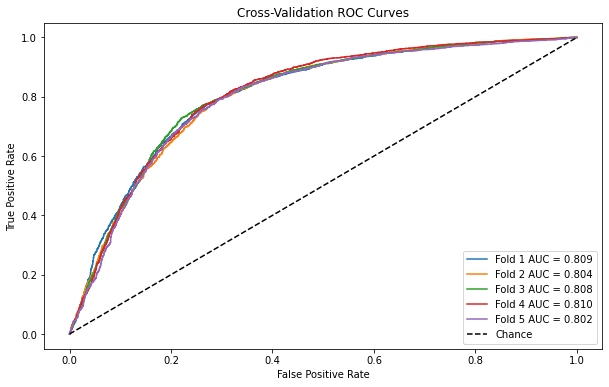

In [52]:
feature_4 = pd.read_csv('feature_4_train.csv')
auc_scores_LGR4 = perform_LGR4(feature_4,data_label['state'])

grid search RandomForestClassifier

In [53]:
def perform_grid_search(X, y, param_grid):
    n_splits = 5
    fold_size = len(X) // n_splits

    best_auc = 0
    best_params = {}

    for max_depth in param_grid['max_depth']:
        for n_estimators in param_grid['n_estimators']:
            auc_scores = []
            
            for i in range(n_splits):
                start, end = i * fold_size, (i + 1) * fold_size
                X_val = X.iloc[start:end]
                y_val = y.iloc[start:end]
                X_train = X.drop(X.index[start:end])
                y_train = y.drop(y.index[start:end])
                
                model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)
                model.fit(X_train, y_train)
                y_pred_proba = model.predict_proba(X_val)[:, 1]
                auc_score = roc_auc_score(y_val, y_pred_proba)
                auc_scores.append(auc_score)
            
            avg_auc = np.mean(auc_scores)
            
            if avg_auc > best_auc:
                best_auc = avg_auc
                best_params = {
                    'max_depth': max_depth,
                    'n_estimators': n_estimators
                }

    return best_auc, best_params

In [54]:
param_grid = {
    'max_depth': [20, 30, 50],
    'n_estimators': [100, 200, 300]
}
X = feature_4 
y = data_label['state'] 
best_auc, best_params = perform_grid_search(X, y, param_grid)
print("Best AUC:", best_auc)
print("Best Parameters:", best_params)


Best AUC: 0.897269311083754
Best Parameters: {'max_depth': 50, 'n_estimators': 300}


In [57]:
def add_columns_back(train_windows, test_windows, train_features_df, test_features_df):
    columns_to_add = ['sequence', 'subject', 'step']

    # Check if lengths match
    if len(train_windows) != len(train_features_df) or len(test_windows) != len(test_features_df):
        raise ValueError("The number of windows does not match the number of rows in the DataFrame.")

    for col in columns_to_add:
        train_features_df[col] = [window[col].iloc[0] if not window.empty else None for window in train_windows]
        test_features_df[col] = [window[col].iloc[0] if not window.empty else None for window in test_windows]

    return train_features_df, test_features_df



In [58]:

feature_4_train = pd.read_csv('feature_4_train.csv')
feature_4_test = pd.read_csv('feature_4_test.csv') 
final_train_dataset, final_test_dataset = add_columns_back(train_windows, test_windows, feature_4_train, feature_4_test)


In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

def predict_and_plot(train_dataset, test_dataset, data_label, output_filename='submission.csv', histogram_filename='prediction_results.png'):
    
    model = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=50)
    model.fit(train_dataset.drop('sequence', axis=1), data_label['state'])

    test_predictions = model.predict(test_dataset.drop('sequence', axis=1))

    submission = pd.DataFrame({
        'sequence': test_dataset['sequence'],
        'state': test_predictions
    })
    submission.to_csv(output_filename, index=False)

    predict_results = pd.read_csv(output_filename)
    sns.countplot(x='state', data=predict_results)
    plt.savefig(histogram_filename)
    plt.show()

    return predict_results

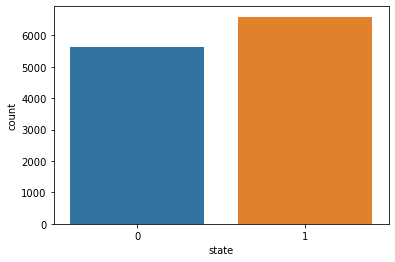

In [66]:
predict_results = predict_and_plot(final_train_dataset, final_test_dataset, data_label)